In [1]:
#Importing Dependencies

import pandas as pd
import numpy as np
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import json
import re
from datetime import datetime 
from datetime import time
from pytz import timezone
import pytz

#openings = pd.read_csv("chess_openings.csv")

In [2]:
#Stating Url and Username

url = "https://api.chess.com/pub/player/"
name = "jsteele619"

In [3]:
# For Loop to collect all the months that contain archives (API comes in url form)
query = f"{url}{name}/games/archives"
for queries in query:
    archives = requests.get(query).json()

In [4]:
len(archives['archives'])

102

In [5]:
#Looping to get all the games in all the archives, still sorted by archive 

all_the_games = []

for archive in archives['archives']:
    total_games = requests.get(archive).json()
    all_the_games.append(total_games)

In [6]:
#Finding the number of games in each of archive (needed for For Loop)
number_games = [] 

for x in range(len(archives['archives'])):
    number = len(all_the_games[x]['games'])
    number_games.append(number)

In [7]:
# Getting a useable list of games to For Loop
chess_games = []

for y in range(101):
    soup = all_the_games[y]['games']
    chess_games.append(soup)

In [8]:
# Using zipped For Loop to append all games to one list

zipper = zip(range(101), number_games)
    
total_games = []
for x, b in zipper:
    tots = chess_games[x]
    for y in range(b):
        total = tots[y]
        total_games.append(total)

len(total_games)

13441

In [9]:
# CODE BREAK

In [10]:
#Example result 
# comes in large string format which needs to be further parsed

total_games[-1]

{'url': 'https://www.chess.com/live/game/5859245093',
 'pgn': '[Event "Live Chess"]\n[Site "Chess.com"]\n[Date "2020.12.01"]\n[Round "-"]\n[White "jsteele619"]\n[Black "chicomaster"]\n[Result "1-0"]\n[CurrentPosition "8/3k2p1/2n2p2/p1BN4/6PP/8/P4P2/6K1 b - -"]\n[Timezone "UTC"]\n[ECO "B27"]\n[ECOUrl "https://www.chess.com/openings/Sicilian-Defense-2.Nf3"]\n[UTCDate "2020.12.01"]\n[UTCTime "04:38:24"]\n[WhiteElo "2100"]\n[BlackElo "2075"]\n[TimeControl "300"]\n[Termination "jsteele619 won by resignation"]\n[StartTime "04:38:24"]\n[EndDate "2020.12.01"]\n[EndTime "04:44:25"]\n[Link "https://www.chess.com/live/game/5859245093"]\n\n1. Nf3 {[%clk 0:04:56]} 1... c5 {[%clk 0:04:58.3]} 2. e4 {[%clk 0:04:53.7]} 2... Nc6 {[%clk 0:04:57.4]} 3. d4 {[%clk 0:04:48]} 3... cxd4 {[%clk 0:04:53]} 4. Nxd4 {[%clk 0:04:47.4]} 4... Nf6 {[%clk 0:04:52.2]} 5. Nc3 {[%clk 0:04:46.2]} 5... e5 {[%clk 0:04:51.3]} 6. Nf3 {[%clk 0:04:44]} 6... Bb4 {[%clk 0:04:49.9]} 7. Bd3 {[%clk 0:04:38.3]} 7... d5 {[%clk 0:04:48.7

In [11]:
# Creating fancy For Loop to loop through json data and append data lists

url = []
date = []
time = []
time_control = []

white_name = []
white_rating = []
white_result = []

black_name = []
black_rating = []
black_result = []

eco_code = []
eco_name = []

for i in range(len(total_games)):
    url1 = total_games[i]['url']
    url.append(url1)
    
    date1 = total_games[i]['pgn'].split('\n')[2].split(" ")[1]
    date1 = date1[:-2]
    date1 = date1[1:]
    date.append(date1)
    
    time1 = total_games[i]['pgn'].split('\n')[12].split(" ")[1]
    time1 = time1[:-2]
    time1 = time1[1:]
    
    if len(time1) == 8: 
        time1 = datetime.strptime(time1, '%H:%M:%S')
        time.append(time1.time())
    else:
        time1 = (None)
        time.append(time1)
    
    time_c = total_games[i]['time_control']
    time_control.append(time_c)
    
    white1 = total_games[i]['white']['username']
    white_name.append(white1)
    
    rating1 = total_games[i]['white']['rating']
    white_rating.append(rating1)
    
    result1 = total_games[i]['white']['result']
    white_result.append(result1)
    
    black1 = total_games[i]['black']['username']
    black_name.append(black1)
    
    black2 = total_games[i]['black']['rating']
    black_rating.append(black2)
    
    black3 = total_games[i]['black']['result']
    black_result.append(black3)
    
    eco1 = re.sub("\W", "", total_games[i]['pgn'].split('\n')[9].split(" ")[1])
    eco_code.append(eco1)
    
    try:
        
        eco2 = total_games[i]['pgn'].split('\n')[10].split("/")[4].split("]")[0]
        eco3 = eco2[:-1]
        eco_name.append(eco3)
    except:
        eco_name.append(None)

In [12]:
# Looking for length of "pgn" annotation per games to use in For Loop
pgn_number = []
for i in range(len(total_games)):
    try:
        pgn1 = len(total_games[i]['pgn'].split("\n")[22].split(" "))
        pgn_number.append(pgn1)
    except:
        pgn_number.append(None)

In [13]:
# Zip together length of total_games, and the number of pgn per game

zipper = zip(range(len(total_games)), pgn_number)

pgn_score = []
pgn = []

# Complicated For Loop which only appends the 1st, and 2nd element, 
# while skipping the 3rd and 4th

for y, z in zipper:
    total = total_games[y]
    x = 0
    pgn = []
    
    try:
        for i in range(z):
        
            try:
                x = x + 1
        
                if x == 1:
                    pgn1 = total['pgn'].split("\n")[22].split(" ")[i]
                    pgn.append(pgn1)
               
                elif x == 2:
                    pgn2 = total['pgn'].split("\n")[22].split(" ")[i]
                    pgn.append(pgn2)
    
                elif x == 3:
                    pass
    
                else:
                    x = 0
        
            except:
                pgn_score.append(None)
            
        pgn_score.append(pgn)
    except:
        pgn_score.append(None)

In [14]:
white_bool = []

for x in range(len(white_result)):
    if white_result[x] == "win":
        y = 1
        white_bool.append(y)
    elif (white_result[x] == "resigned" or white_result[x] == "timeout" or white_result[x] == "checkmated" or white_result[x] == "abandoned"):
        y = 0
        white_bool.append(y)
    else: 
        y = 0.5
        white_bool.append(y)

In [15]:
black_bool = []

for x in range(len(white_result)):
    if black_result[x] == "win":
        y = 1
        black_bool.append(y)
    elif (black_result[x] == "resigned" or black_result[x] == "timeout" or black_result[x] == "checkmated" or black_result[x] == "abandoned"):
        y = 0
        black_bool.append(y)
    else: 
        y = 0.5
        black_bool.append(y)

In [16]:
#Example result of pgn_score (computer usable!)
for pgn in pgn_score[12000]:
    print(pgn)

1.
c4
1...
Nf6
2.
Nc3
2...
e5
3.
Nf3
3...
Nc6
4.
d4
4...
exd4
5.
Nxd4
5...
Bc5
6.
Nb3
6...
Bb4
7.
f3
7...
O-O
8.
e4
8...
Nxe4
9.
fxe4
9...
Qh4+
10.
Kd2
10...
d6
11.
a3
11...
Bxc3+
12.
Kxc3
12...
Re8
13.
Bd3
13...
Ne5
14.
g4
14...
Bxg4
15.
Qe1
15...
Qf6
16.
Rf1
16...
Nf3+
17.
Kc2
17...
Nxe1+
18.
Rxe1
18...
Qf2+
19.
Bd2
19...
a5
20.
Nc1
20...
a4
21.
b4
21...
Re7
22.
Rf1
22...
Qxh2
23.
Rb1
23...
Rae8
24.
b5
24...
Rxe4
25.
Bxe4
25...
Rxe4
26.
Nd3
26...
Rxc4+
27.
Kb2
27...
Qxd2+
28.
Ka1
28...
Qxd3
29.
Rb2
29...
Qd4
30.
Re1
30...
Kf8
31.
Ka2
31...
Be6
32.
Rxe6
32...
fxe6
33.
b6
33...
c6
34.
Re2
34...
Ke7
35.
Kb1
35...
Qd1+
36.
Kb2
36...
Qxe2+
0-1


In [17]:
# Turning pgn into single string for SQL to parse

pgn_string = []
string1 = ""

for x in range(len(pgn_score)):
    string1 = ""
    try:
        pgn1 = pgn_score[x]
       
        for pgn in pgn1:
            string1 += pgn + " "
        
        pgn_string.append(string1)
    
    except:
        pgn_string.append(None)
        
       

In [18]:
# Creating a master dataframe on the data I collected
total_games_df = {"date": date, "time": time, "time_control": time_control, "white_name": white_name, "white_rating": white_rating,
                 "white_result": white_result, "white_bool": white_bool, "black_name": black_name, "black_rating": black_rating, 
                 "black_result": black_result, "black_bool": black_bool, "eco_code": eco_code, "eco_name": eco_name, "pgn_score": pgn_score, "pgn_string": pgn_string, "url": url}

the_master_df = pd.DataFrame(total_games_df)
the_master_df.head()

,date,time,time_control,white_name,white_rating,white_result,white_bool,black_name,black_rating,black_result,black_bool,eco_code,eco_name,pgn_score,pgn_string,url
0,2012.07.22,20:44:40,1800,jsteele619,1000,checkmated,0.0,kevin914,1200,win,1.0,C24,Bishops-Opening-Berlin-Defense-3.d3-d5,"[1., e4, 1..., e5, 2., Bc4, 2..., Nf6, 3., d3,...",1. e4 1... e5 2. Bc4 2... Nf6 3. d3 3... d5 4....,https://www.chess.com/live/game/332713828
1,2012.07.22,21:36:00,1800,mupmilan,1043,resigned,0.0,jsteele619,1146,win,1.0,C50,Italian-Game,"[1., e4, 1..., e5, 2., Nf3, 2..., Nc6, 3., Bc4...",1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... f6 4...,https://www.chess.com/live/game/332735999
2,2012.07.22,22:01:19,1800,Hoschemal,1133,checkmated,0.0,jsteele619,1251,win,1.0,C00,French-Defense-Normal-Variation,"[1., d4, 1..., e6, 2., e4, 2..., c6, 3., e5, 3...",1. d4 1... e6 2. e4 2... c6 3. e5 3... g6 4. f...,https://www.chess.com/live/game/332746229
3,2012.07.22,22:31:54,1800,jsteele619,1177,resigned,0.0,GDhar,1330,win,1.0,C44,Scotch-Game,"[1., e4, 1..., e5, 2., Nf3, 2..., Nc6, 3., d4,...",1. e4 1... e5 2. Nf3 2... Nc6 3. d4 3... d6 4....,https://www.chess.com/live/game/332758116
4,2012.07.22,23:07:03,1800,jsteele619,1106,resigned,0.0,NaturalBornKiller_94,1355,win,1.0,B10,Caro-Kann-Defense-Breyer-Variation-2...d5,"[1., e4, 1..., c6, 2., d3, 2..., d5, 3., f3, 3...",1. e4 1... c6 2. d3 2... d5 3. f3 3... dxe4 4....,https://www.chess.com/live/game/332771264


In [19]:
# Changing datatypes
the_master_df['date'] = pd.to_datetime(the_master_df['date'])
the_master_df = the_master_df.dropna()
the_master_df['white_rating'] = the_master_df['white_rating'].astype(int)
the_master_df['black_rating'] = the_master_df['black_rating'].astype(int)

#No no no
#the_master_df['white_bool'] = the_master_df['white_bool'].astype(int)
#the_master_df['black_bool'] = the_master_df['black_bool'].astype(int)

In [20]:
the_master_df.to_csv("csv_files/master_df.csv", index=False)

In [21]:
# BREAK

In [22]:
# Analysis
the_master_df['white_result'].value_counts()
the_master_df['time_control'].value_counts()

300         6402
600         6346
60           294
180          283
1800          30
900+5         27
180+2          9
300+2          5
1/86400        4
300+5          3
900            3
1/604800       2
1/259200       2
120+1          1
900+10         1
120            1
Name: time_control, dtype: int64

In [23]:
#Creating dataframes for each color

white_df = the_master_df.where(the_master_df['white_name'] == 'jsteele619')
white_df = white_df.dropna()
black_df = the_master_df.where(the_master_df['black_name'] == 'jsteele619')
black_df = black_df.dropna()

In [24]:
# Finding ratio of results for each color
#white_list = the_master_df['white_bool'].where(the_master_df['white_name'] == 'jsteele619')
#black_list = the_master_df['black_bool'].where(the_master_df['black_name'] == 'jsteele619')
#black_list[0]/black_list.sum()
#black_list[1]/black_list.sum()
#black_list[0.5]/black_list.sum()
#white_list[0]/white_list.sum()
#white_list[1]/white_list.sum()
#white_list[0.5]/white_list.sum()

In [25]:
# Creating DF for each time control
white_df5 = the_master_df.where(the_master_df['white_name'] == 'jsteele619').where(the_master_df['time_control'] == '300')
black_df5 = the_master_df.where(the_master_df['black_name'] == 'jsteele619').where(the_master_df['time_control'] == '300')
white_df10 = the_master_df.where(the_master_df['white_name'] == 'jsteele619').where(the_master_df['time_control'] == '600')
black_df10 = the_master_df.where(the_master_df['black_name'] == 'jsteele619').where(the_master_df['time_control'] == '600')

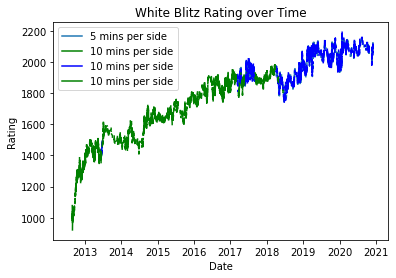

In [26]:
# Graphing Blitz Rating results by time control
fig = plt.figure()
ax = plt.axes()

ax.plot(white_df5["date"], white_df5["white_rating"], label="5 mins per side")
ax.plot(white_df10["date"], white_df10["white_rating"], label="10 mins per side", color='green')
ax.plot(black_df5["date"], black_df5["black_rating"], label="10 mins per side", color='blue')
ax.plot(black_df10["date"], black_df10["black_rating"], label="10 mins per side", color='green')

ax.legend(loc="best")
plt.title("White Blitz Rating over Time")
plt.xlabel("Date")
plt.ylabel("Rating")
plt.savefig("graphs/whiteblitz.png")
plt.show()

In [27]:
#Getting the bins for graphing
white_graph_time = []
black_graph_time = []

for time in white_df['time']:
    white_graph_time.append(time.hour)  
    
for time in black_df['time']:
    black_graph_time.append(time.hour)
    
#Getting the list of bool results for graphing
    
white_graph_bool = []
black_graph_bool = []

for bools in white_df['white_bool']:
    white_graph_bool.append(bools)  
    
for bools in black_df['black_bool']:
    black_graph_bool.append(bools)   
    
#Combining lists

big_graph_time = white_graph_time + black_graph_time
big_graph_bool = white_graph_bool + black_graph_bool

print(f'Lengths of both lists: {len(big_graph_bool)} and {len(big_graph_time)}')

Lengths of both lists: 13413 and 13413


In [28]:
zipped = {"big_graph_time": big_graph_time, "big_graph_bool": big_graph_bool}
zips = pd.DataFrame(zipped)

In [29]:
#Creating list of frequency per result, per hour:
zips1 = zips.where(zips['big_graph_bool'] == 1.0)
zips5 = zips.where(zips['big_graph_bool'] == 0.5)
zips0 = zips.where(zips['big_graph_bool'] == 0.0)
zips1 = zips1.dropna()
zips0 = zips0.dropna()
zips5 = zips5.dropna()

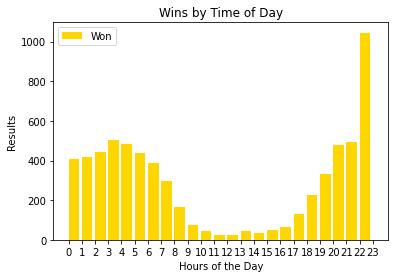

In [30]:
#Graphing wins per Time Hour
N = 24
ind = np.arange(N)
bins = ind

plt.hist(zips1['big_graph_time'], bins, width=0.8, label='Won', color='gold')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Wins by Time of Day")
plt.savefig("graphs/winperhour.png")

plt.show()

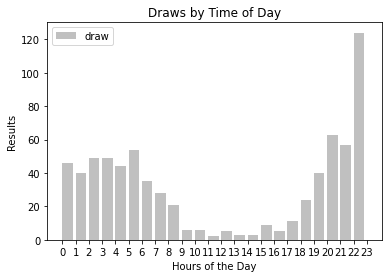

In [31]:
#Graphing draws per Time Hour
N = 24
ind = np.arange(N)
bins = ind

plt.hist(zips5['big_graph_time'], bins, width=0.8, label='draw', color='silver')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Draws by Time of Day")
plt.savefig("graphs/drawperhour.png")
plt.show()

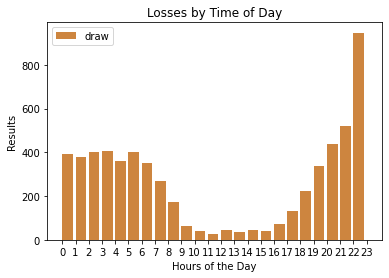

In [32]:
#Graphing losses per Time Hour
N = 24
ind = np.arange(N)
bins = ind

plt.hist(zips0['big_graph_time'], bins, width=0.8, label='draw', color='#CD853F')

plt.xticks(ind)
plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Losses by Time of Day")
plt.savefig("graphs/lossperhour.png")

plt.show()

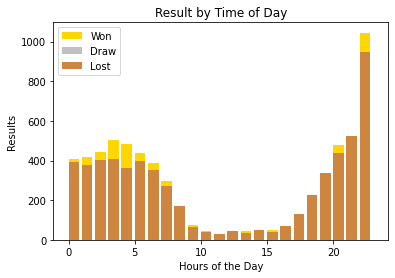

In [33]:
# Comparison Wins and Losses

N = 24
ind = np.arange(N)
bins = ind

plt.hist(zips1['big_graph_time'], bins, width=0.8, label='Won', color='gold', stacked=True)
plt.hist(zips5['big_graph_time'], bins, width=0.8, label='Draw', color='silver', stacked=True)
plt.hist(zips0['big_graph_time'], bins, width=0.8, label='Lost', color='#CD853F', stacked=True)

plt.ylabel("Results")
plt.xlabel("Hours of the Day")
plt.legend(loc="best")
plt.title("Result by Time of Day")
plt.savefig("graphs/comparisonperhour.png")

plt.show()

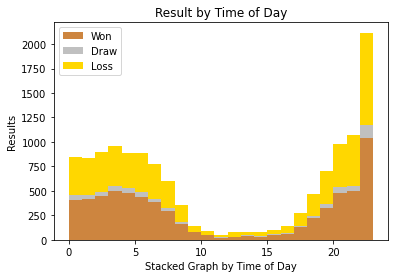

In [34]:
#The Stacked Graph by hour
N = 24
ind = np.arange(N)
bins = ind

plt.hist([zips1['big_graph_time'], zips5['big_graph_time'], zips0['big_graph_time']], bins, color=['#CD853F', 'silver', 'gold'], label=['Won', 'Draw', 'Loss'], stacked=True)

plt.ylabel("Results")
plt.xlabel("Stacked Graph by Time of Day")
plt.legend(loc="best")
plt.title("Result by Time of Day")
plt.savefig("graphs/stackedperhour.png")

plt.show()